In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df= pd.read_csv("sales_transaction.csv")
df

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,cost_price,profit,profit_margin,Revenue,Total Expense (COGS),Net Income,Total Equity,Total Assets,Operating Income,Gross Margin,Net Margin,Ratio of Equity,Ratio of Assets,Operating Margin
0,Prod234,Cus010,Mark003,04-10-2020,1,1796,1131.48,664.52,0.37,1796,1131.48,664.52,664.52,2927.48,2460.52,0.37,37,100,22.70,137.0
1,Prod237,Cus010,Mark003,04-10-2020,1,801,825.03,-24.03,-0.03,801,825.03,-24.03,-24.03,1626.03,776.97,-0.03,-3,100,-1.48,97.0
2,Prod188,Cus010,Mark003,04-10-2020,1,1435,1894.20,-459.20,-0.32,1435,1894.20,-459.20,-459.20,3329.20,975.80,-0.32,-32,100,-13.79,68.0
3,Prod106,Cus035,Mark007,04-10-2020,1,694,610.72,83.28,0.12,694,610.72,83.28,83.28,1304.72,777.28,0.12,12,100,6.38,112.0
4,Prod093,Cus035,Mark007,04-10-2020,1,440,334.40,105.60,0.24,440,334.40,105.60,105.60,774.40,545.60,0.24,24,100,13.64,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,Prod290,Cus019,Mark011,13-10-2020,1,102,137.70,-35.70,-0.35,102,137.70,-35.70,-35.70,239.70,66.30,-0.35,-35,100,-14.89,65.0
984,Prod283,Cus019,Mark011,13-10-2020,1,46,60.26,-14.26,-0.31,46,60.26,-14.26,-14.26,106.26,31.74,-0.31,-31,100,-13.42,69.0
985,Prod105,Cus017,Mark011,13-10-2020,1,148,164.28,-16.28,-0.11,148,164.28,-16.28,-16.28,312.28,131.72,-0.11,-11,100,-5.21,89.0
986,Prod057,Cus017,Mark011,13-10-2020,1,231,235.62,-4.62,-0.02,231,235.62,-4.62,-4.62,466.62,226.38,-0.02,-2,100,-0.99,98.0


In [44]:
df["Gross Margin"] = ((df["Revenue"] - df["Total Expense (COGS)"]) / df["Revenue"]) * 100
df["Net Income"] = (df["Net Income"] / df["Revenue"]) * 100
df["Operating Margin"] = (df["Operating Income "] / df["Revenue"]) * 100
df["ROE"] = (df["Net Income"] / df["Total Equity"]) * 100
df["ROA"] = (df["Net Income"] / df["Total Assets "]) * 100

In [58]:
print("\nProfitability Ratios:")
print(df[["product_code", "Gross Margin", "Net Margin", "Operating Margin", "ROE", "ROA", "Ratio of Equity", "Ratio of Assets"]])


Profitability Ratios:
    product_code  Gross Margin  Net Margin  Operating Margin           ROE  \
0        Prod234          37.0          37             137.0      0.000003   
1        Prod237          -3.0          -3              97.0      0.000379   
2        Prod188         -32.0         -32              68.0      0.000011   
3        Prod106          12.0          12             112.0      0.000895   
4        Prod093          24.0          24             124.0      0.013781   
..           ...           ...         ...               ...           ...   
983      Prod290         -35.0         -35              65.0     88.797138   
984      Prod283         -31.0         -31              69.0  10554.872947   
985      Prod105         -11.0         -11              89.0      9.515458   
986      Prod057          -2.0          -2              98.0      0.658155   
987      Prod290          16.0          16             116.0      0.241559   

              ROA Ratio of Equity  Ratio

In [60]:
benchmark = df[["Gross_Margin", "Net Margin", "Operating Margin", "ROE", "ROA"]].mean()
print("\nIndustry Benchmarks:")
print(benchmark)


Industry Benchmarks:
Gross_Margin             1.754049
Net Margin               1.754049
Operating Margin       101.449324
ROE                 192753.772247
ROA                 -26944.719859
dtype: float64


<Figure size 1200x800 with 0 Axes>

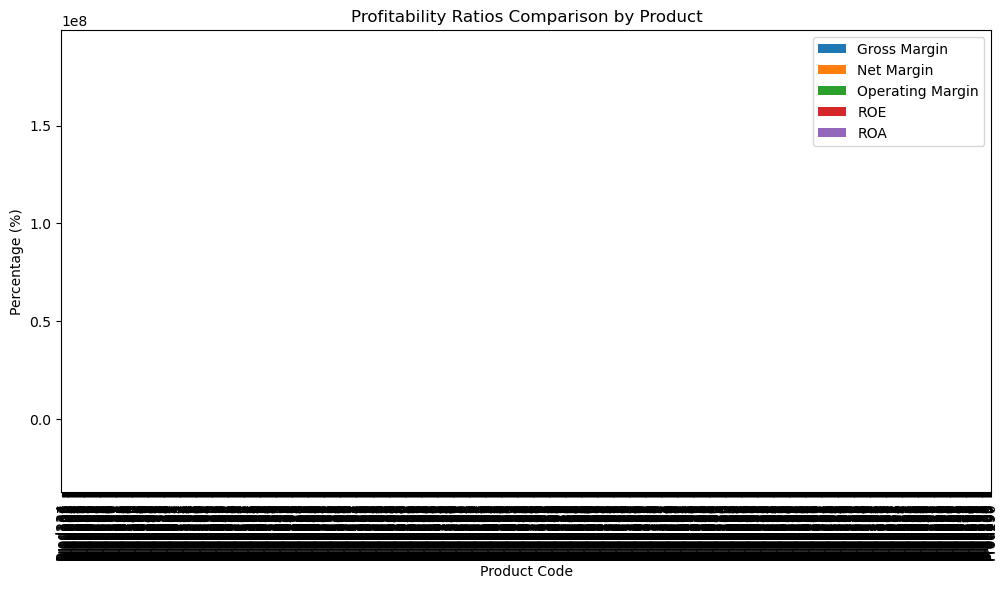

In [62]:
plt.figure(figsize=(12, 8))
df.set_index("product_code")[["Gross Margin", "Net Margin", "Operating Margin", "ROE", "ROA"]].plot(
    kind="bar", figsize=(12, 6), title="Profitability Ratios Comparison by Product"
)
plt.ylabel("Percentage (%)")
plt.xlabel("Product Code")
plt.show()

In [70]:
# Ensure that the 'order_date' column is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [74]:
# Now perform the trend analysis
trend_df = df.groupby(df['order_date'].dt.year).agg({
    'Gross Margin': 'mean',
    'Net Margin': 'mean'
}).reset_index()

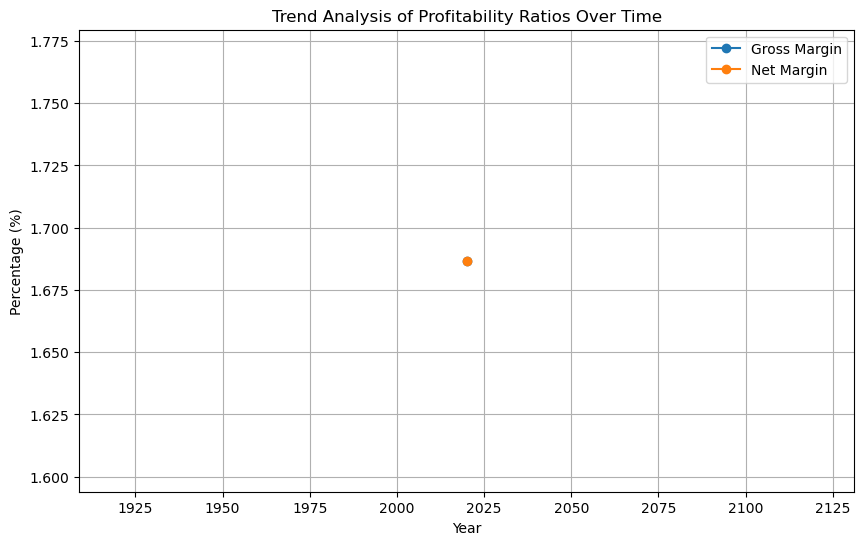

In [76]:
# Plot Trends
plt.figure(figsize=(10, 6))
plt.plot(trend_df['order_date'], trend_df['Gross Margin'], marker='o', label='Gross Margin')
plt.plot(trend_df['order_date'], trend_df['Net Margin'], marker='o', label='Net Margin')
plt.title("Trend Analysis of Profitability Ratios Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.show()
